# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Abednego Baharaja Silalahi
- **Email:** abednego9123@gmail.com
- **ID Dicoding:** abednego99

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh faktor cuaca, suhu, dan musim terhadap pola penyewaan sepeda, dan strategi apa yang dapat diterapkan untuk meningkatkan penggunaan sepeda pada hari-hari dengan kondisi cuaca buruk atau suhu ekstrem?

- Apa langkah yang dapat diambil agar meningkatnya penyewa langganan/terdaftar dari pelanggan kasual, terutama pada hari kerja dan akhir pekan, berdasarkan pola penggunaan dan preferensi yang sudah tersedia di data penyewaan?


## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
#membuat tabel day
day_df = pd.read_csv("Data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
#membuat tabel hour
hour_df = pd.read_csv("Data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dengan variabel seperti weekday dan workingday, kita bisa mengidentifikasi bagaimana perilaku penyewaan berubah pada hari kerja dibandingkan dengan akhir pekan atau hari libur.
- Dengan variabel temp (temperatur) dan hum (kelembaban), Anda bisa menganalisis bagaimana suhu udara dan kelembaban mempengaruhi jumlah penyewaan sepeda.

### Assessing Data

In [4]:
# menilai data day
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


- Tidak adanya masalah tipe data dalam kolom tersebut, dan juga tidak terdapat missing value

In [5]:
# menilai data hour
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


- Tidak adanya masalah tipe data dalam kolom tersebut, dan juga tidak terdapat missing value

**Insight:**
- Tidak adanya masalah tipe data 
- Tidak adanya missing value

### Cleaning Data

In [6]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [7]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


Mengecek Duplikasi Data

In [8]:
print("jumlah duplikasi data hour_df: ", hour_df.duplicated().sum())
print("jumlah duplikasi data day_df: ", day_df.duplicated().sum())

jumlah duplikasi data hour_df:  0
jumlah duplikasi data day_df:  0


In [9]:
# Mengecek apakah ada missing values
print("\nJumlah missing values (Hour Data):")
print(hour_df.isna().sum())

print("\nJumlah missing values (Day Data):")
print(day_df.isna().sum())



Jumlah missing values (Hour Data):
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Jumlah missing values (Day Data):
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [10]:
# Menghapus kolom 'instant' karena hanya merupakan indeks yang tidak relevan
day_df_clean = day_df.drop(columns=['instant'])
hour_df_clean = hour_df.drop(columns=['instant'])

print("Data Day setelah dibersihkan:")
day_df_clean.head()



Data Day setelah dibersihkan:


,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [11]:
print("Data Hour setelah dibersihkan:")
hour_df_clean.head()

Data Hour setelah dibersihkan:


,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Selanjutnya, yaitu memperbaiki format tanggal

In [12]:
# Memperbaiki format tanggal
hour_df_clean['dteday'] = pd.to_datetime(hour_df_clean['dteday'])
print(hour_df_clean.dtypes)

dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
hr                     int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


In [13]:
day_df_clean['dteday'] = pd.to_datetime(day_df_clean['dteday'])
print(day_df_clean.dtypes)

dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


**Insight:**
- Dengan melakukan pengecekan nilai yang hilang dan duplikasi data, Missing values dan duplikasi data bisa menyebabkan hasil analisis menjadi tidak akurat. 
- Menghapus Kolom Tidak Relevan. Kolom instant adalah penanda indeks yang tidak memiliki relevansi untuk analisis.

## Exploratory Data Analysis (EDA)

### Explore Data hour

**Disini saya menggunakan dataset hourly karena memiliki detail waktu yang lebih spesifik dan observasi yang lebih banyak**

In [14]:
hour_df_clean.describe(include="all")

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


### Penyewaan Sepeda Berdasarkan hari dan jam

In [15]:
# Mengelompokkan data berdasarkan weekday dan jam, menghitung rata-rata dan jumlah penyewaan
hourly_grouped = hour_df_clean.groupby(by=['weekday', 'hr']).agg(
    avg_rentals=('cnt', 'mean'),
    total_rentals=('cnt', 'sum'),
    num_records=('cnt', 'count')  
).reset_index()
hourly_grouped.describe()

,weekday,hr,avg_rentals,total_rentals,num_records
count,168.000000,168.000000,168.000000,168.000000,168.000000
mean,3.000000,11.500000,188.467516,19599.279762,103.446429
std,2.005979,6.942881,144.981111,15090.549952,1.891547
min,0.000000,0.000000,4.152174,382.000000,92.000000
25%,1.000000,5.750000,61.828291,6445.750000,103.000000
50%,3.000000,11.500000,176.050784,18220.500000,104.000000
75%,5.000000,17.250000,275.834135,28865.250000,104.000000
max,6.000000,23.000000,544.278846,56605.000000,105.000000


### Pengaruh Cuaca dan Musim dalam Penyewaan

In [16]:
# Mengelompokkan data berdasarkan musim dan kondisi cuaca, menghitung rata-rata dan maksimum penyewaan
season_weather = hour_df_clean.groupby(by=['season', 'weathersit']).agg(
    avg_rentals=('cnt', 'mean'),
    max_rentals=('cnt', 'max')
).reset_index()

season_weather.describe()

,season,weathersit,avg_rentals,max_rentals
count,13.000000,13.000000,13.000000,13.000000
mean,2.384615,2.153846,158.128138,790.230769
std,1.192928,0.987096,62.915936,224.719512
min,1.000000,1.000000,58.650407,164.000000
25%,1.000000,1.000000,115.179803,782.000000
50%,2.000000,2.000000,171.955390,868.000000
75%,3.000000,3.000000,209.463779,905.000000
max,4.000000,4.000000,244.494207,977.000000


### Penyewaan Sepeda berdasarkan Hari Kerja dan Weekend

In [17]:
working_day = hour_df_clean.groupby(by='workingday').agg(
    avg_rentals=('cnt', 'mean'),
    max_rentals=('cnt', 'max')
).reset_index()

working_day.describe()

,workingday,avg_rentals,max_rentals
count,2.000000,2.000000,2.000000
mean,0.500000,187.306543,880.000000
std,0.707107,8.345573,137.178716
min,0.000000,181.405332,783.000000
25%,0.250000,184.355937,831.500000
50%,0.500000,187.306543,880.000000
75%,0.750000,190.257148,928.500000
max,1.000000,193.207754,977.000000


### Pengaruh Suhu terhadap Penyewaan

In [18]:
temperature = hour_df_clean.groupby(by=hour_df_clean['temp']).agg(
    avg_rentals=('cnt', 'mean'),
    max_rentals=('cnt', 'max'),
    min_rentals=('cnt', 'min')
).reset_index()

temperature.describe()

,temp,avg_rentals,max_rentals,min_rentals
count,50.000000,50.000000,50.000000,50.000000
mean,0.510000,194.038406,701.920000,33.040000
std,0.291548,111.723620,245.235317,89.806586
min,0.020000,28.235294,84.000000,1.000000
25%,0.265000,92.658191,571.250000,1.000000
50%,0.510000,199.357044,771.000000,1.000000
75%,0.755000,283.689474,890.250000,4.000000
max,1.000000,539.000000,977.000000,539.000000


### Penyewaan Berdasarkan Bulan dan Tahun

In [19]:
month_year = hour_df_clean.groupby(by=['yr', 'mnth']).agg(
    avg_rentals=('cnt', 'mean'),
    min_rentals = ('cnt', 'min'),
    max_rentals=('cnt', 'max'),
    total_rentals=('cnt', 'sum')
).reset_index()

month_year.describe()

,yr,mnth,avg_rentals,min_rentals,max_rentals,total_rentals
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,0.500000,6.500000,188.628399,1.333333,676.000000,137194.958333
std,0.510754,3.526299,70.796043,0.816497,211.592718,52267.138331
min,0.000000,1.000000,55.507267,1.000000,249.000000,38189.000000
25%,0.000000,3.750000,139.558762,1.000000,557.500000,100811.250000
50%,0.500000,6.500000,184.773450,1.000000,633.000000,136256.000000
75%,1.000000,9.250000,247.803710,1.000000,879.750000,179634.250000
max,1.000000,12.000000,303.573611,4.000000,977.000000,218573.000000


**Insight:**
- Pada hari kerja, menunjukkan pola penyewaan yang meningkat terutama hari senin sampai jumat
- Rata-rata penyewaan sepeda paling tinggi terjadi pada musim panas (kategori 2 atau cerah), menunjukkan bahwa cuaca yang baik memiliki dampak signifikan terhadap penggunaan sepeda.
- Rata-rata penyewaan sepeda lebih tinggi pada hari kerja (kategori 1) dibandingkan dengan akhir pekan (kategori 0).
- Penyewaan sepeda menunjukkan bahwa jumlah penyewaan paling tinggi terjadi pada rentang suhu sedang. Ini berarti suhu yang nyaman berperanbesar dalam menark minat untuk bersepeda.
- Selama bulan-bulan musim panas, penyewaan sepeda cenderung meningkat

## Visualization & Explanatory Analysis

### Pertanyaan 1:

Bagaimana pengaruh faktor cuaca, suhu, dan musim terhadap pola penyewaan sepeda?



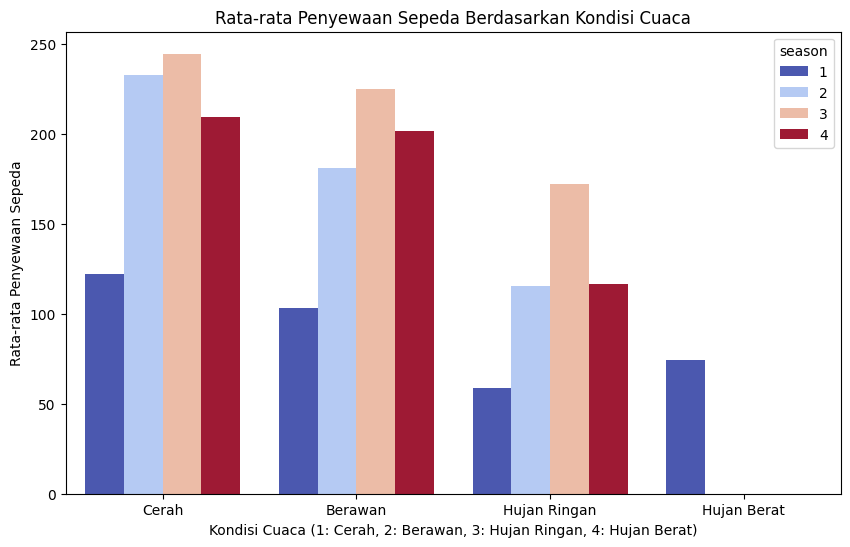

In [20]:
# Visualisasi boxplot untuk melihat pengaruh kondisi cuaca terhadap penyewaan
plt.figure(figsize=(10, 6))
sns.barplot(x='weathersit', y='avg_rentals', data=season_weather, hue='season', palette='coolwarm')
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca (1: Cerah, 2: Berawan, 3: Hujan Ringan, 4: Hujan Berat)')
plt.ylabel('Rata-rata Penyewaan Sepeda')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Cerah', 'Berawan', 'Hujan Ringan', 'Hujan Berat'])
plt.show()


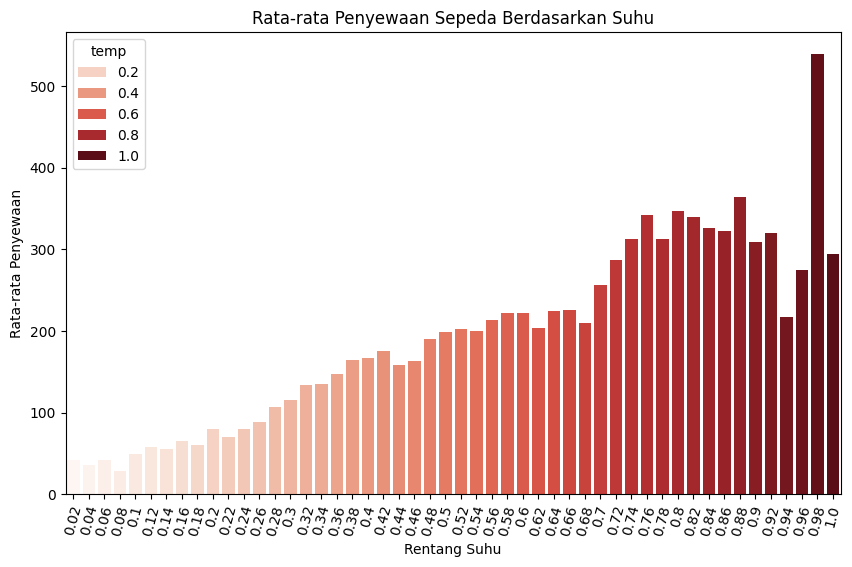

In [21]:
# Visualisasi data berdasarkan suhu
plt.figure(figsize=(10, 6))
sns.barplot(x='temp', y='avg_rentals', data=temperature, hue='temp', palette='Reds')
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Suhu')
plt.xlabel('Rentang Suhu')
plt.ylabel('Rata-rata Penyewaan')
plt.xticks(rotation=75)
plt.show()



### Pertanyaan 2:

Apa langkah yang dapat diambil agar meningkatnya penyewa langganan/terdaftar dari pelanggan kasual?

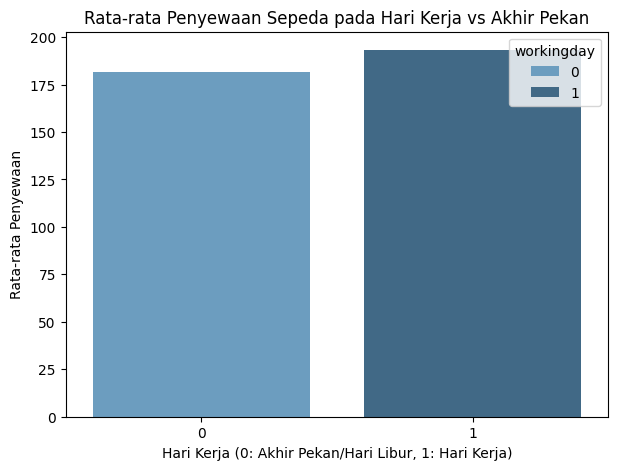

In [22]:
# Visualisasi rata-rata dan total penyewaan pada hari kerja vs akhir pekan
plt.figure(figsize=(7, 5))
sns.barplot(x='workingday', y='avg_rentals', data=working_day, hue='workingday', palette='Blues_d')
plt.title('Rata-rata Penyewaan Sepeda pada Hari Kerja vs Akhir Pekan')
plt.xlabel('Hari Kerja (0: Akhir Pekan/Hari Libur, 1: Hari Kerja)')
plt.ylabel('Rata-rata Penyewaan')
plt.show()

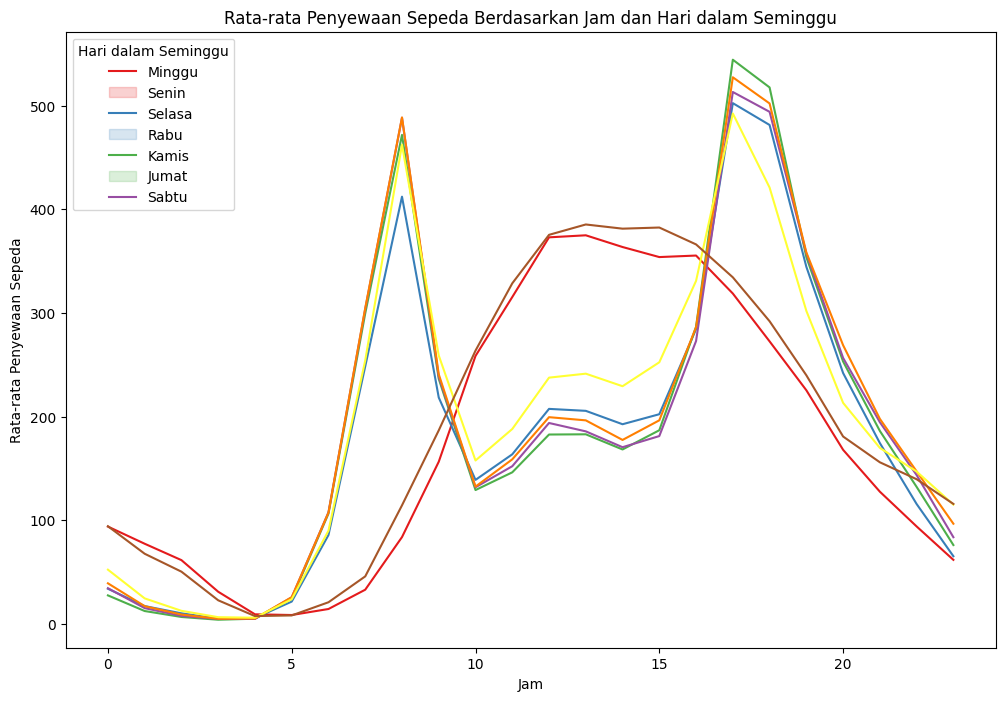

In [23]:
# Visualisasi rata-rata penyewaan dan total penyewaan berdasarkan weekday dan jam
plt.figure(figsize=(12, 8))
sns.lineplot(x='hr', y='avg_rentals', hue='weekday', data=hourly_grouped, palette='Set1')
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Jam dan Hari dalam Seminggu')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Penyewaan Sepeda')
plt.legend(title='Hari dalam Seminggu', loc='upper left', labels=['Minggu', 'Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu'])
plt.show()

**Insight:**
- Terlihat bahwa rata-rata penyewaan sepeda meningkat pada suhu yang rasional (sekitar 20-30°C) dan cuaca yang cerah, sedangkan menurun pada suhu ekstrem dan cuaca buruk, baik yang terlalu rendah dan terlalu tinggi.
Perusahaan dapat mempromosikan penyewaan saat hari-hari dengan suhu yang nyaman dan cuaca yang cerah.

- Terlihat bahwa rata-rata penyewaan sepeda leih tinggi pada hari kerja dibandingkan dengan akhir pekan, dan terlihat dengan hari jumat dan senin sebagai puncaknya.
Untuk meningkatkan penggunaan dan pelanggan di akhir pekan, perusahaan dapat memperkenalkan program promosi khusus untuk pengguna kasual yang menyewa sepeda pada hari Sabtu dan Minggu. Perusahaan juga dapat mengadakan acara komunitas, seperti bersepeda bersama, yang bisa mengundang pelanggan kasual untuk mencoba layanan dan mendorong mereka untuk mendaftar.


## Analisis Lanjutan

### Clustering Berbasis Waktu

mengelompokkan pengguna berdasarkan waktu penyewaan sepeda ke dalam cluster pengguna subuh, pagi, siang, sore, dan malam.

In [43]:
# Membuat kolom cluster berdasarkan waktu penyewaan
hour_df_clean['time_cluster'] = pd.cut(hour_df_clean['hr'], 
                                         bins=[-1, 6, 12, 15, 18, 24], 
                                         labels=['Dini hari', 'Pagi', 'Siang', 'Sore', 'Malam'])

# Melihat cluster
print(hour_df_clean[['hr', 'time_cluster']].head(24))

    hr time_cluster
0    0    Dini hari
1    1    Dini hari
2    2    Dini hari
3    3    Dini hari
4    4    Dini hari
5    5    Dini hari
6    6    Dini hari
7    7         Pagi
8    8         Pagi
9    9         Pagi
10  10         Pagi
11  11         Pagi
12  12         Pagi
13  13        Siang
14  14        Siang
15  15        Siang
16  16         Sore
17  17         Sore
18  18         Sore
19  19        Malam
20  20        Malam
21  21        Malam
22  22        Malam
23  23        Malam


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10192\1216528636.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cluster = hour_df_clean.groupby(by=['time_cluster', 'workingday']).agg(


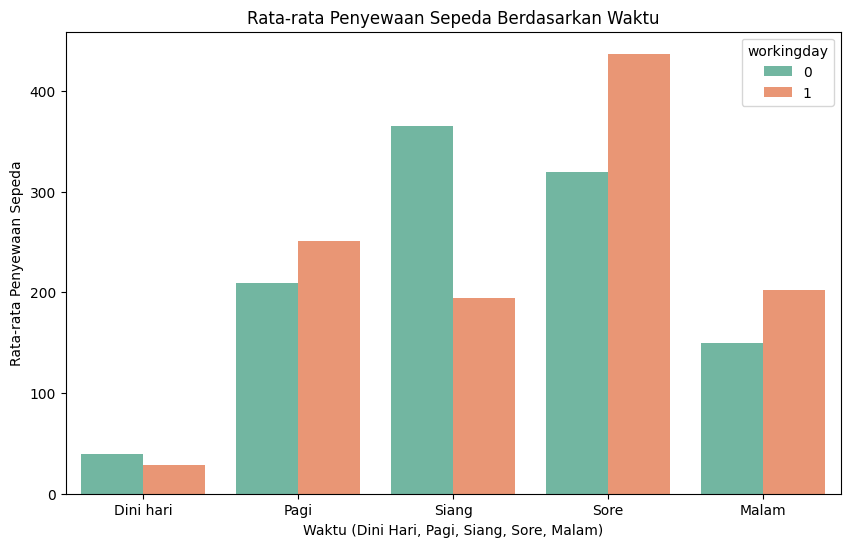

In [44]:
#Visualisasi Data Cluster
cluster = hour_df_clean.groupby(by=['time_cluster', 'workingday']).agg(
    avg_rentals=('cnt', 'mean'),
    total_rentals=('cnt', 'sum')
).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='time_cluster', y='avg_rentals', data=cluster, hue='workingday', palette='Set2')
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Waktu')
plt.xlabel('Waktu (Dini Hari, Pagi, Siang, Sore, Malam)')
plt.ylabel('Rata-rata Penyewaan Sepeda')
plt.show()

**Insight**
- Bisa kita lihat kalau pengguna lebih sering menyewa di hari libur siang dan hari kerja sore hari

## Conclusion

- Cuaca dan suhu sangat mempengaruhi berapa banyak sepeda yang disewa. Dari analisis, kita bisa lihat bahwa lebih banyak sepeda disewa saat cuaca cerah. Namun, begitu cuaca mulai mendung, hujan ringan, atau bahkan hujan lebat, jumlah penyewaan turun drastis. Hal yang sama juga berlaku untuk suhu—orang lebih sering menyewa sepeda saat suhunya nyaman (sekitar 20-30°C), dan cenderung menghindari menyewa sepeda saat terlalu panas atau terlalu dingin.
Untuk mendorong lebih banyak orang menyewa sepeda di hari-hari dengan cuaca buruk atau suhu ekstrem, kita bisa menawarkan diskon atau promosi khusus. Misalnya, beri potongan harga pada hari-hari hujan ringan, atau promosikan rute yang lebih teduh pada hari yang panas. Ini bisa membuat pengguna tetap tertarik menyewa sepeda, meskipun cuaca tidak ideal.

- Dari data penyewaan, kita bisa melihat bahwa sepeda lebih banyak disewa pada hari kerja dibandingkan akhir pekan. Ini menunjukkan bahwa banyak orang menggunakan sepeda untuk perjalanan rutin, seperti ke tempat kerja, terutama pengguna yang sudah terdaftar. Di akhir pekan, pengguna kasual lebih aktif, tapi jumlah penyewaan mereka cenderung stabil sepanjang hari.
Untuk menarik lebih banyak pengguna kasual menjadi pengguna terdaftar, kita bisa membuat program khusus, seperti diskon berlangganan atau keuntungan eksklusif bagi anggota. Misalnya, kita bisa tawarkan paket diskon di akhir pekan atau buat acara bersepeda bersama. Ini bisa menarik perhatian pengguna kasual dan mendorong mereka untuk mendaftar agar bisa menikmati lebih banyak keuntungan, sehingga mereka lebih sering menggunakan sepeda.

